In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go

import jou_gen as jg

In [23]:
folder_path = r'D:\ANSYS Fluent Projects\Hydraulics\V4.5\19MPE_woch\fluent\V3'
file_name = 'mdot_report_IT70.csv'

In [24]:
distrib_df, coll_df = jg.export(folder_path,'IT70')

In [25]:
sum = coll_df['mdot'].sum()
mdot_inlet = 0.0278
coll_df['mdot'] = (coll_df['mdot']/sum)*mdot_inlet

In [38]:
x_range = np.arange(1, 39)
flat_value = mdot_inlet / len(x_range)

In [37]:
# fig, ax = plt.subplots()

# ax.scatter(coll_df.index, coll_df['mdot'], label='mdot coll',marker='+')

# plt.legend()

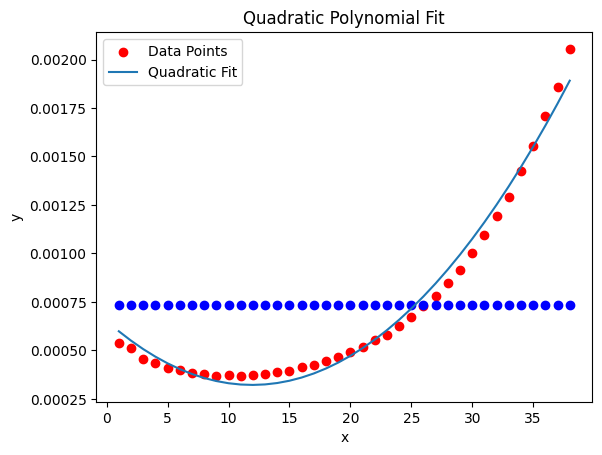

In [39]:
coefficients = np.polyfit(coll_df.index, coll_df['mdot'], 2)
polynomial = np.poly1d(coefficients)

# Generate x values for plotting the polynomial curve
x_poly = np.arange(1,39,1)

# Generate y values for plotting
y_poly = polynomial(x_poly)

# Plot the original data points
plt.scatter(coll_df.index, coll_df['mdot'], color='red', label='Data Points')
plt.scatter(coll_df.index, len(coll_df.index)*[flat_value], color='blue', label='')

# Plot the polynomial curve
plt.plot(x_poly, y_poly, label='Quadratic Fit')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Polynomial Fit')
plt.legend()

# Show the plot
plt.show()


In [41]:
coeffs_flat = np.array([0, 0, flat_value])

# Generate 20 intermediate sets of coefficients
num_steps = 20
intermediate_coeffs = [coeffs_flat + (polynomial - coeffs_flat) * i / (num_steps - 1) for i in range(num_steps)]

# Convert intermediate_coeffs to poly1d objects for easier evaluation
intermediate_functions = [np.poly1d(coeffs) for coeffs in intermediate_coeffs]

# Verify by calculating the sum of each intermediate function over the range to ensure it matches the desired sum
sums_of_intermediate_functions = [np.sum(func(x_range)) for func in intermediate_functions]

# Checking if all sums are approximately equal to mdot_inlet
all_sums_equal = np.allclose(sums_of_intermediate_functions, mdot_inlet, atol=1e-6)

In [45]:
fig = go.Figure()

# Add a scatter plot for each intermediate function
for func in intermediate_functions:
    fig.add_trace(go.Scatter(x=x_range, y=func(x_range), mode='lines'))

# Set the layout of the figure
fig.update_layout(
    title='Intermediate Functions',
    xaxis_title='x',
    yaxis_title='y'
)

# Show the figure
fig.show()